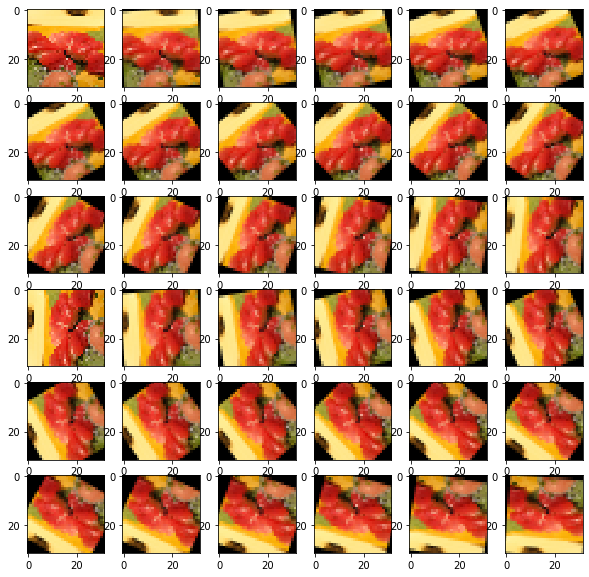

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 写真データ読み込み
photos = np.load('image/photos.npz')
x = photos['x']
img = x[12] # 良い感じの写真を選択

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    center = (16, 16)
    angle = i * 5 # 角度変更
    scale = 1
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (32, 32))
    plt.imshow(img2)
plt.show()


In [7]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする 
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる 
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)        
        
# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))



水増し前= 240
水増し後= 5760


Epoch 1/7
90/90 [==============================] - 11s 126ms/step - loss: 0.9500 - accuracy: 0.5554 - val_loss: 0.8391 - val_accuracy: 0.6500
Epoch 2/7
90/90 [==============================] - 11s 125ms/step - loss: 0.6711 - accuracy: 0.7288 - val_loss: 0.9711 - val_accuracy: 0.5500
Epoch 3/7
90/90 [==============================] - 12s 128ms/step - loss: 0.5189 - accuracy: 0.7927 - val_loss: 0.8841 - val_accuracy: 0.7000
Epoch 4/7
90/90 [==============================] - 12s 128ms/step - loss: 0.3544 - accuracy: 0.8630 - val_loss: 1.3500 - val_accuracy: 0.6000
Epoch 5/7
90/90 [==============================] - 12s 129ms/step - loss: 0.2535 - accuracy: 0.9040 - val_loss: 1.7164 - val_accuracy: 0.6333
Epoch 6/7
90/90 [==============================] - 12s 129ms/step - loss: 0.1959 - accuracy: 0.9399 - val_loss: 2.1279 - val_accuracy: 0.6167
Epoch 7/7
2/2 [==============================] - 0s 17ms/step - loss: 1.8537 - accuracy: 0.6167
正解率= 0.6166666746139526 loss= 1.8536769151687622


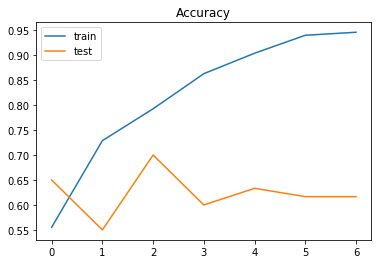

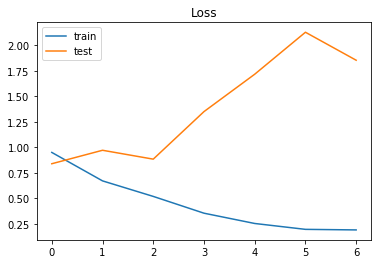

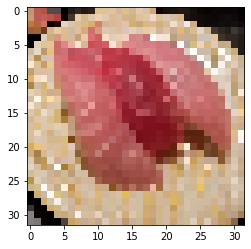

この写真は、 寿司 で、カロリーは 588 kcal
寿司 : 99 %)


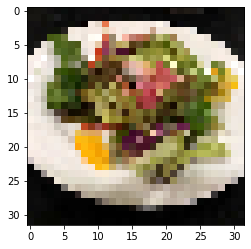

この写真は、 サラダ で、カロリーは 118 kcal
サラダ : 99 %)


In [8]:
# CNNモデル構造を定義 --- (
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))


# モデルをコンパイル 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# グラフ化
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


target_image = "test-sushi.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [588, 118, 648]

# 保存したCNNモデルを読み込む
#model = get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print(LABELS[idx],":", per, "%)")

if __name__ == '__main__':
    check_photo_str('test-sushi.jpg')
    check_photo_str('test-salad.jpg')
